In [49]:
import os
%matplotlib inline
import cv2
import numpy as np
import imageio
import matplotlib.pyplot as plt

from PIL import ImageTk, Image
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [81]:
#fileopenbox opens the box to choose file and help us store file path as string
from IPython.display import Image, display
def upload(b):
    listOfImageNames = ['dogs.jpg']

    for imageName in listOfImageNames:
        display(Image(filename=imageName))
        cartoonify(imageName)

In [82]:
def cartoonify(ImagePath):
    # read the image
    organized_image = cv2.imread(ImagePath)
    organized_image = cv2.cvtColor(organized_image, cv2.COLOR_BGR2RGB)
    
    if organized_image is None:
        print("Cannot find image!!")
        sys.exit()
        
    resized1 = cv2.resize(organized_image, (960, 540))
    plt.imshow(resized1, cmap='gray')
    
    gray_scaled = cv2.cvtColor(organized_image,cv2.COLOR_BGR2GRAY)
    resized2 = cv2.resize(gray_scaled, (960, 540))
    plt.imshow(resized2, cmap='gray')
    
    # smoothing gray scaled image
    smoothed_gray = cv2.medianBlur(gray_scaled, 5)
    resized3 = cv2.resize(smoothed_gray, (960, 540))
    plt.imshow(resized3, cmap='gray')
    
    # retrieving the edges of an image
    get_edge = cv2.adaptiveThreshold(smoothed_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    resized4 = cv2.resize(get_edge, (960, 540))
    plt.imshow(resized4, cmap='gray')
    
    # remove noise and keep edges sharp
    colored_image = cv2.bilateralFilter(organized_image, 9, 300, 300)
    resized5 = cv2.resize(colored_image, (960, 540))
    plt.imshow(resized5, cmap='gray')
    
    # cartoon effect
    cartoon_image = cv2.bitwise_and(colored_image, colored_image, mask=get_edge)
    resized6 = cv2.resize(cartoon_image, (960, 540))
    plt.imshow(resized6, cmap='gray')
    
    # after transition
    image=[resized1, resized2, resized3, resized4, resized5, resized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(image[i], cmap='gray')

In [83]:
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

Button(description='Cartoonify', style=ButtonStyle())

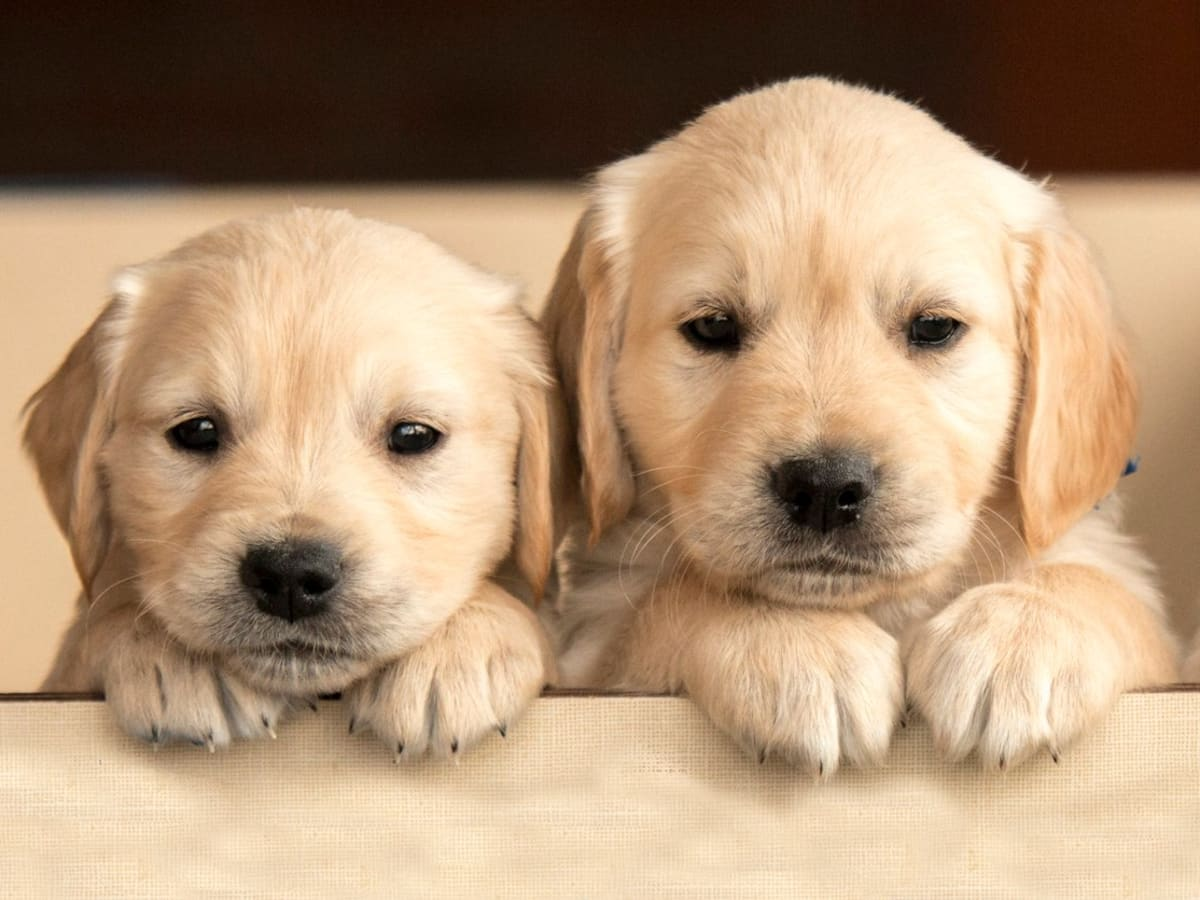

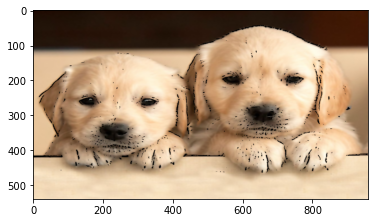

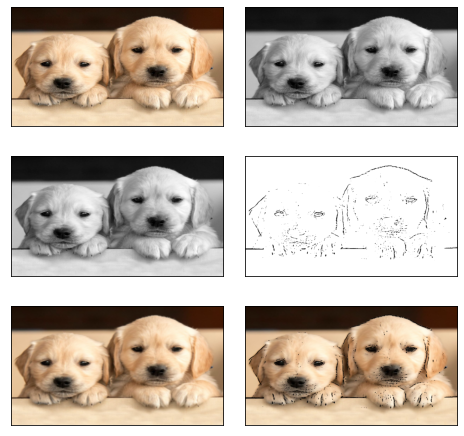

In [84]:
# Interactive bytton 
button = widgets.Button(description = 'Cartoonify')
button.on_click(upload)
display(button)